### 1. Importing modules
1. pandas and numpy for data analysis
2. matplotlib for plotting data

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### 2. Working with csv file in pandas.

#### 2.1 Opening train.csv file.

In [211]:
data = pd.read_csv("train.csv")

#### 2.2 Let's show entire csv file.

In [212]:
data.shape
row_count = 891
pd.set_option('display.max_rows',row_count)

In [213]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.00,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.00,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.00,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.00,1,0,237736,30.0708,NaN,C


### 3. Let's make simple analysis of titanic passengers.

#### 3.1. Analysis of age of passengers.

In [214]:
age = data[data["Age"].notna()]
age = age["Age"]

<AxesSubplot:>

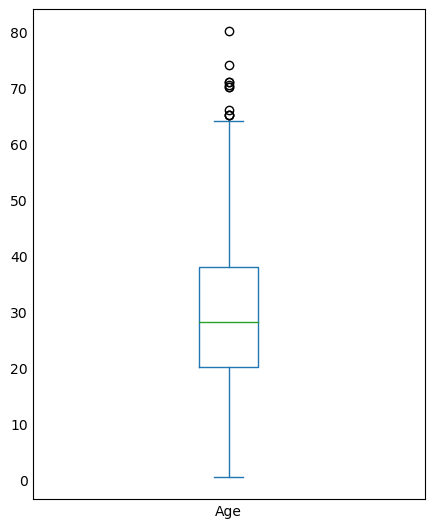

In [215]:
fig, axs = plt.subplots(figsize=(4,5))
age.plot.box(ax = axs)

The box plot shows:
1. **Median age** of the Titanic passengers was ~ 27 years old.
2. **25% - 75%** of passengers were from 20 to 38 years old.
3. There was a passenger as old as **80 years old**. 
4. **Minimum age** of passengers were months old.
5. **Maximum age** of passengers were 64 years old.

#### 3.2  Analysis of passengers sex distribution.

In [216]:
passengers_sex = data["Sex"]

Let's assign 1 to male sex and 2 to female sex.

In [217]:
male: int = 0
female: int = 0
for i in range(row_count):
    if passengers_sex[i] == "male":
        male += 1
    else:
        female += 1

Let's make a pie chart of sex distribution.

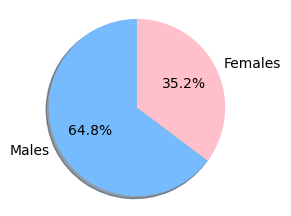

In [218]:
labels = "Males", "Females"
sizes = [male, female]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=['xkcd:sky blue','pink'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

1. 64.8 % of passengers were males.
2. 35.2 % of passengers were females.

### 4. Survival of passangers and its correlation to different parametrs.

#### 4.1 Survival and its correlation to the passanger class.

In [219]:
pclass_surv = data[(data["Survived"] == 1)]
pclass_surv = pclass_surv["Pclass"]

In [220]:
pclass_dead = data[(data["Survived"] == 0)]
pclass_dead = pclass_dead["Pclass"]

In [221]:
live: list = [0, 0, 0]
dead: list = [0, 0, 0]

In [222]:
for i in pclass_surv:
    if i == 1: live[0] += 1
    elif i == 2: live[1] += 1
    elif i == 3: live[2] += 1
for i in pclass_dead:
    if i == 1: dead[0] += 1
    elif i == 2: dead[1] += 1
    elif i == 3: dead[2] += 1

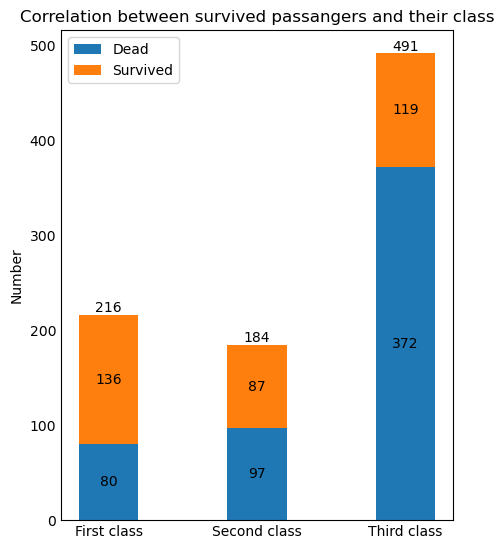

In [223]:
N = 3
ind = np.arange(N)
width = 0.4

fig, ax = plt.subplots(figsize=(4,5))

p1 = ax.bar(ind, dead, width, label='Dead')
p2 = ax.bar(ind, live, width,
            bottom=dead, label='Survived')

ax.set_ylabel('Number')
ax.set_title('Correlation between survived passangers and their class')
ax.set_xticks(ind, labels=['First class', 'Second class', 'Third class'])
ax.legend()

ax.bar_label(p1, label_type='center')
ax.bar_label(p2, label_type='center')
ax.bar_label(p2)

plt.show()

In [224]:
chance_of_survival: list = [0, 0, 0]
for i in range(len(chance_of_survival)):
    chance_of_survival[i] = (live[i] / (live[i] + dead[i])) * 100

In [225]:
chance_of_survival

[62.96296296296296, 47.28260869565217, 24.236252545824847]

1. From all **216** passangers of the first class only **136** people survived.
   Making the chance of survival of the person of the first class **0.63**
2. From all **184** passangers of the second class only **87** people survived.
   Making the chance of survival of the person of the second class **0.47**
3. From all **492** passangers of the third class only **119** people survived.
   Making the chance of survival of the person of the third class **0.24**

#### 4.2 Survival and its correlation to sex and age of a passenger.

Let's find out was a common **Women and children first** code of conduct applied on the Titanic.

We will separate both males and females into three categories according to their age:
1. 0 - 17 years old.
2. 18 - 35 years old.
3. 35+ years old.

In [235]:
surv_female = data[(data["Sex"] == "female") & (data["Survived"] == 1)]
surv_female = surv_female[surv_female["Age"].notna()]
surv_female = surv_female["Age"]

In [239]:
surv_male = data[(data["Sex"] == "male") & (data["Survived"] == 1)]
surv_male = surv_male[surv_male["Age"].notna()]
surv_male = surv_male["Age"]

In [242]:
l_females: list = [0, 0, 0]
for i in surv_female:
    if i < 18: l_females[0] += 1
    elif i <= 35: l_females[1] += 1
    elif i > 35: l_females[2] += 1
l_males: list = [0, 0, 0]
for i in surv_male:
    if i < 18: l_males[0] += 1
    elif i <= 35: l_males[1] += 1
    elif i > 35: l_males[2] += 1

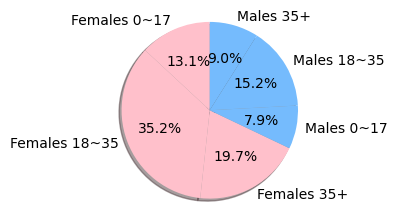

In [249]:
figsize=(12,12)

labels = ["Females 0~17", "Females 18~35", "Females 35+",
         "Males 0~17", "Males 18~35", "Males 35+"]
sizes = [l_females[0], l_females[1], l_females[2],
        l_males[0], l_males[1],l_males[2]]
colors = ['pink', 'pink', 'pink',
          'xkcd:sky blue', 'xkcd:sky blue', 'xkcd:sky blue' ]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

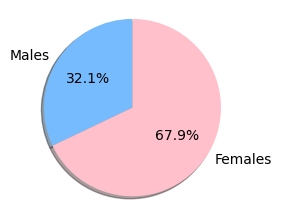

In [251]:
labels = "Males", "Females"
sizes = [l_males[0] + l_males[1] + l_males[2], 
        l_females[0] + l_females[1] + l_females[2]]
fig1, ax1 = plt.subplots()
ax1.pie(sizes, colors=['xkcd:sky blue','pink'], labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

#### Conclusion

It is evident that from the analysed data Women and children first code of conduct was followed during the sinking of the Titanic.
Since number of children on the Titanic is not high enough to conclude that they were not primary saved. Number of women from age 18 to 35 is more representative of the situation on the Titanic. 

Least survived demographic is males other 35 years old.
Most survived demographic is females from 18 to 35 years old.